In [1]:
#importing the neccessary libraries 

import numpy as np
import pandas as pd

In [2]:
#loading the dataset
#this dataset has been downloaded from kaggle 

df= pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
#understanding the dataset 

df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
#total size of the dataset

df.shape

(13320, 9)

In [5]:
#information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
#counting the data values in the respective columns

for column in  df.columns:
    print(df[column].value_counts())
    print("*"*30)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
******************************
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
******************************
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64
***************

In [7]:
#to understand the null values

df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [8]:
#dropping the columns that have no relevance 
df.drop(columns=['area_type','availability','society','balcony'],inplace=True)

In [9]:
df.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [11]:
#statistical analysis of the data 

df.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [12]:
df.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [13]:
df['location'].value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [14]:
df['size'].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [15]:
#filling NA cell with the relevant values #here we are replacing the missing data with the highest apprearing values in that column

df['location']=df['location'].fillna('Sajapur Road')
df['size']= df['size'].fillna('2 BHK')


#for bath missing values, we are replacing it with Median

df['bath']=df['bath'].fillna(df['bath'].median())

In [16]:
df.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [17]:
#NA values filled successfully 

In [18]:
#Extracting the BHK Values from the size column 

df['BHK']= df['size'].str.split().str.get(0).astype(int)

In [19]:
df.describe()

,bath,price,BHK
count,13320.000000,13320.000000,13320.000000
mean,2.688814,112.565627,2.802778
std,1.338754,148.971674,1.294496
min,1.000000,8.000000,1.000000
25%,2.000000,50.000000,2.000000
50%,2.000000,72.000000,3.000000
75%,3.000000,120.000000,3.000000
max,40.000000,3600.000000,43.000000


In [20]:
#checking the localities with 20> BHK

df[df.BHK>20]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [21]:
#understanding the Total Sq.Ft values

df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [22]:
#it is clear from the dataset that the column has some values in range format. 
#so we need to convert range to the float values 

In [23]:
#defining function to convert range values

def convert_range(x):
    temp= x.split('-')
    if len(temp)==2:
        return (float(temp[0])+float(temp[1]))/2
    try: 
        return float(x)
    except:
        return None 
        
    

In [24]:
#converting the given data range in 'Total Sqft' columns 

df['total_sqft']= df['total_sqft'].apply(convert_range)

In [25]:
#checking data again

df['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [26]:
df.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


# Feature Engineering

## Price Per Square Feet

In [27]:
#adding new colums for price per square ft

df['price_sqft']= df['price']*100000/df['total_sqft']

In [28]:
df['price_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_sqft, Length: 13320, dtype: float64

In [29]:
df.describe()

,total_sqft,bath,price,BHK,price_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [30]:
df.isna().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
BHK            0
price_sqft    46
dtype: int64

In [31]:
#df.to_csv("BHP_Cleaned_Data.csv", index= False)

In [32]:
df['location'].value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Uvce Layout                         1
Abshot Layout                       1
Name: count, Length: 1306, dtype: int64

# Dimenstionality Reduction


As the location variable has 1306 unique values, we need to reduce the dimensionlaity for proper functioning of one hot coding. For these we are marking all those locations which have less than 10 values and "All other locations"

In [33]:
df['location']=df.location.apply(lambda x: x.strip())

In [34]:
location_count= df['location'].value_counts()
location_count

location
Whitefield                            541
Sarjapur  Road                        399
Electronic City                       304
Kanakpura Road                        273
Thanisandra                           237
                                     ... 
1Channasandra                           1
Hosahalli                               1
Vijayabank bank layout                  1
near Ramanashree California resort      1
Abshot Layout                           1
Name: count, Length: 1295, dtype: int64

In [35]:
location_count_less_10= location_count[location_count<=10]
location_count_less_10

location
BTM 1st Stage                         10
Nagadevanahalli                       10
Basapura                              10
Sector 1 HSR Layout                   10
Dairy Circle                          10
                                      ..
1Channasandra                          1
Hosahalli                              1
Vijayabank bank layout                 1
near Ramanashree California resort     1
Abshot Layout                          1
Name: count, Length: 1054, dtype: int64

In [36]:
df.location= df.location.apply(lambda x: 'other' if x in location_count_less_10 else x)

In [37]:
df['location'].value_counts()

location
other                 2886
Whitefield             541
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: count, Length: 242, dtype: int64

In [38]:
len(df.location.unique())

242

# Removing Outliers

**From the dataset it is evident that some of the housing unit has suspicious area per bedroom (i.e. 200 sqft per bedroom). We will remove these outliers by considering minimun 300 sqft per bedroom**

In [39]:
df.describe()

,total_sqft,bath,price,BHK,price_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [40]:
(df['total_sqft']/df['BHK']).describe()

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [41]:
df= df[(df['total_sqft']/df['BHK'])>=300]
df.describe()

,total_sqft,bath,price,BHK,price_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,152.077329,0.976678,4162.237981
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [42]:
df.shape

(12530, 7)

In [43]:
df['price_sqft'].describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_sqft, dtype: float64

**Here we find that min price per sqft is 267 rs/sqft whereas max is 176470, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation**

In [44]:
def remove_outliers_sqft(df):
    df_output = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m= np.mean(subdf.price_sqft)
        
        st= np.std(subdf.price_sqft)
        
        gen_df=subdf[(subdf.price_sqft>(m-st)) & (subdf.price_sqft<=(m+st))]
        df_output= pd.concat([df_output, gen_df],ignore_index=True)
    return df_output

df= remove_outliers_sqft(df)
df.describe()



    
    
    

,total_sqft,bath,price,BHK,price_sqft
count,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000
mean,1508.440608,2.471702,91.286372,2.574896,5659.062876
std,880.694214,0.979449,86.342786,0.897649,2265.774749
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1110.000000,2.000000,49.000000,2.000000,4244.897959
50%,1286.000000,2.000000,67.000000,2.000000,5175.600739
75%,1650.000000,3.000000,100.000000,3.000000,6428.571429
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


In [86]:
def bhk_outlier_remover(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats= {}
        for BHK, bhk_df in location_df.groupby('BHK'):
            bhk_stats[BHK]={
                'mean':np.mean(bhk_df.price_sqft),
                'std': np.std(bhk_df.price_sqft),
                'count':bhk_df.shape[0]
            }
        for BHK, bhk_df in location_df.groupby('BHK'):
            stats= bhk_stats.get(BHK-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')
            

In [87]:
df= bhk_outlier_remover(df)

In [89]:
df.shape

(7361, 7)

In [90]:
df

,location,size,total_sqft,bath,price,BHK,price_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10292,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10293,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10296,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10297,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


In [95]:
df.drop(columns=['size','price_sqft'],inplace=True)

In [96]:
df

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10292,other,1200.0,2.0,70.0,2
10293,other,1800.0,1.0,200.0,1
10296,other,1353.0,2.0,110.0,2
10297,other,812.0,1.0,26.0,1


## Data Visualization

**Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like**

In [97]:
import matplotlib.pyplot as plt
import matplotlib

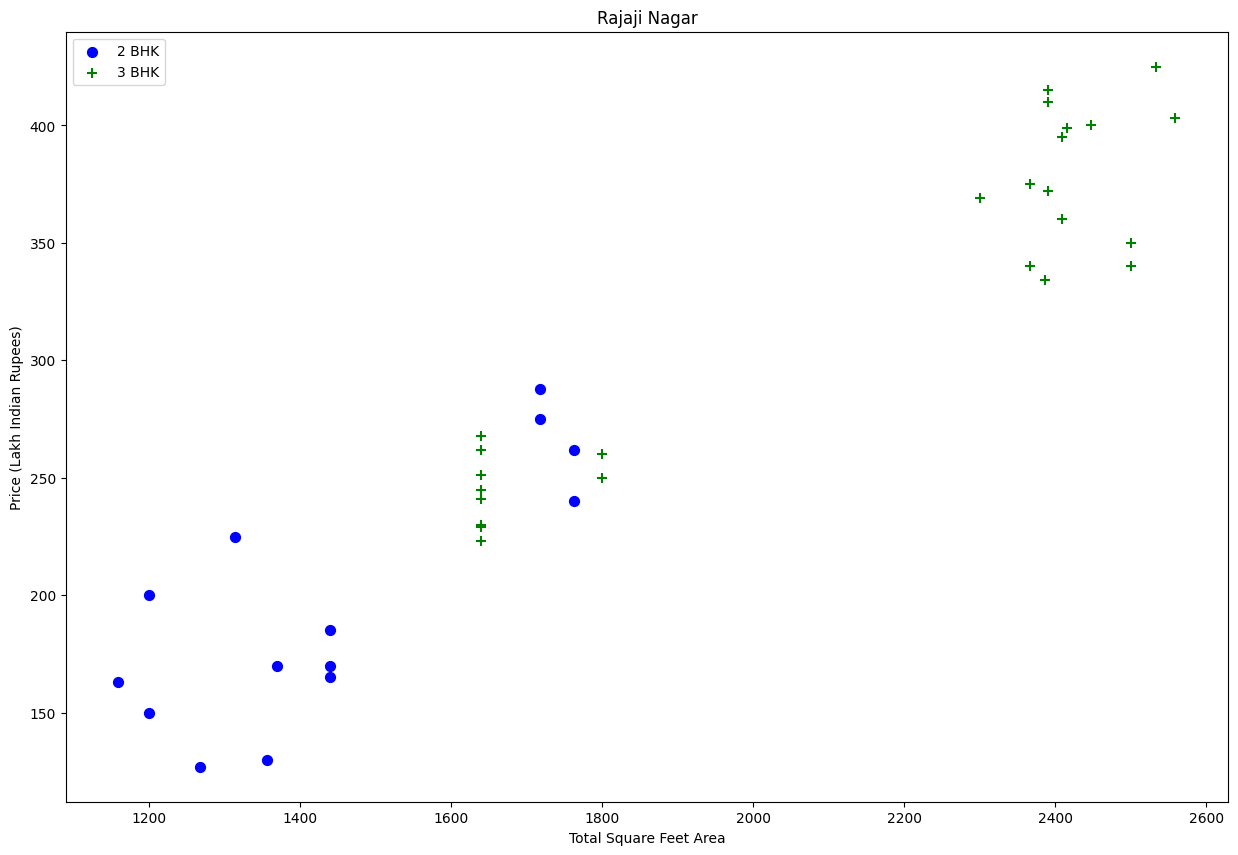

In [98]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df,"Rajaji Nagar")

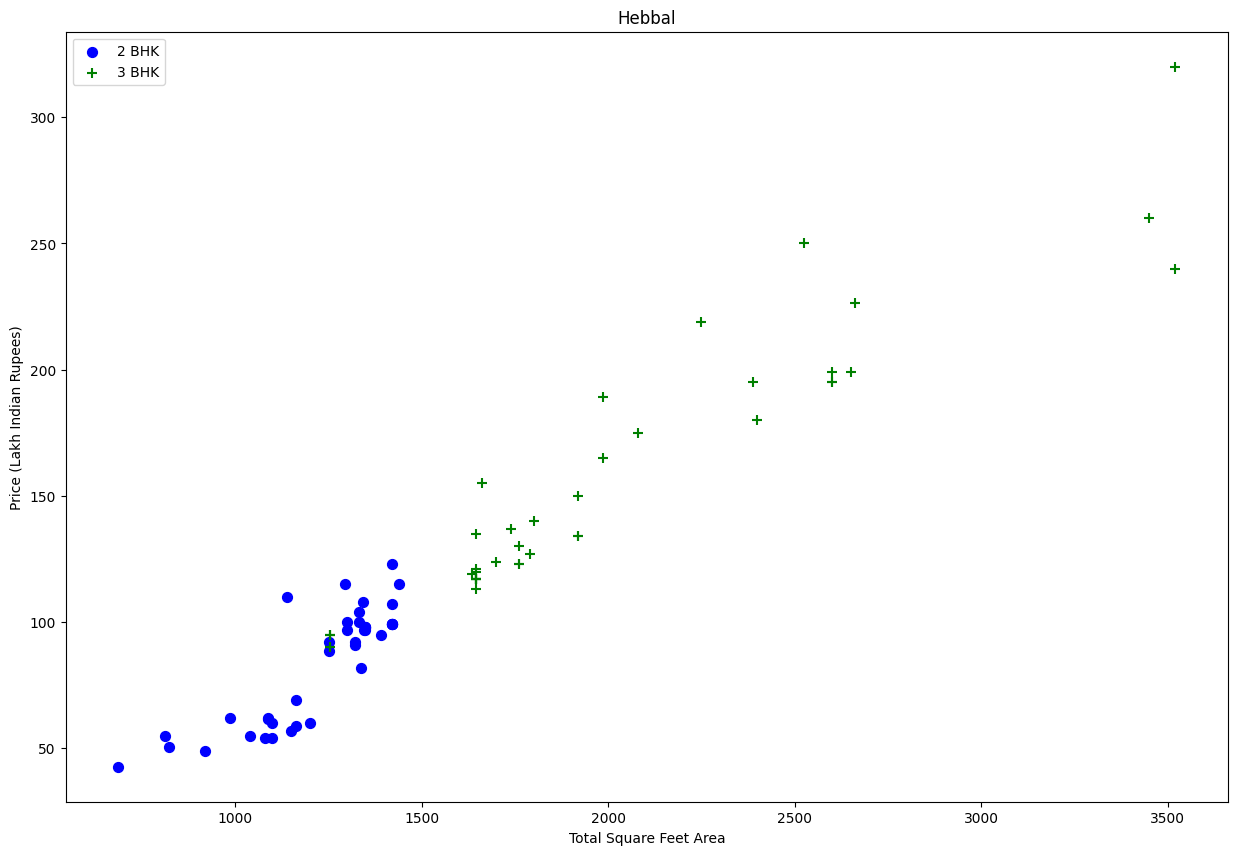

In [99]:
plot_scatter_chart(df,"Hebbal")

In [101]:
df.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

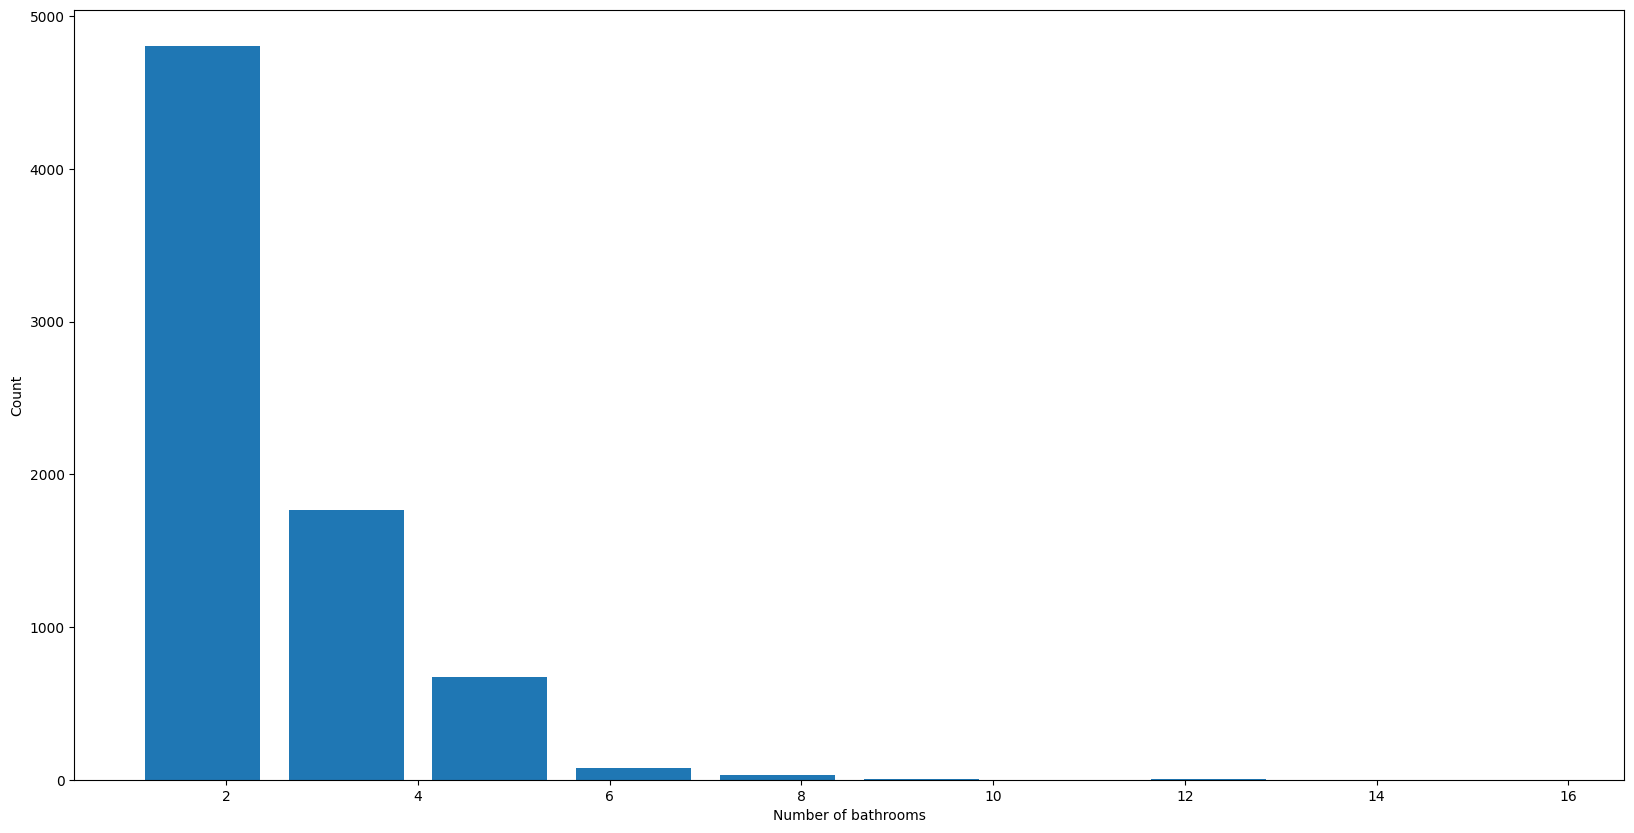

In [102]:
plt.hist(df.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [104]:
df.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [105]:
df

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10292,other,1200.0,2.0,70.0,2
10293,other,1800.0,1.0,200.0,1
10296,other,1353.0,2.0,110.0,2
10297,other,812.0,1.0,26.0,1


In [107]:
df.to_csv('Cleaned_Data_Bengaluru.csv')

# ML Model Building


In [108]:
#defining X and y parameters

X= df.drop(columns=['price'])
y=df['price']

In [114]:
#importing all librariees

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [116]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [117]:
print(X_train.shape)
print(y_test.shape)

(5888, 4)
(1473,)


### Apply Linear Regression 

In [128]:
column_trans= make_column_transformer((OneHotEncoder(sparse_output=False),['location']),remainder='passthrough')

In [122]:
scaler= StandardScaler()

In [125]:
lr= LinearRegression()

In [129]:
pipe= make_pipeline(column_trans,scaler,lr)

In [130]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [131]:
y_pred_lr= pipe.predict(X_test)

In [132]:
r2_score(y_test,y_pred_lr)

0.8233980974003452

## Applying Lasso Regression

In [133]:
lasso= Lasso()

In [134]:
pipe= make_pipeline(column_trans,scaler,lasso)

In [135]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [136]:
y_pred_lasso= pipe.predict(X_test)

In [137]:
r2_score(y_test,y_pred_lasso)

0.8128285650772719

## Applying Ridge Regression

In [139]:
ridge= Ridge()
pipe= make_pipeline(column_trans,scaler,ridge)

In [140]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [141]:
y_pred_ridge= pipe.predict(X_test)

In [142]:
r2_score(y_test,y_pred_ridge)

0.8234146633312648

In [143]:
print ("No Regularization:",r2_score(y_test,y_pred_lr))
print("Lasso:",r2_score(y_test,y_pred_lasso))
print("Ridge:",r2_score(y_test,y_pred_ridge))

No Regularization: 0.8233980974003452
Lasso: 0.8128285650772719
Ridge: 0.8234146633312648


In [144]:
import pickle

In [145]:
pickle.dump(pipe,open('RidgeModel.pkl','wb'))